## Identify trends and patterns in loan behavior and credit scores of borrowers

### Importing Packages

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker    
lbl_enc = LabelEncoder()

### Reading the dataset with the loan data

In [56]:
data = pd.read_csv('Loan_Repayment.csv')

In [61]:
# computing number of rows
rows = len(data.axes[0])
 
# computing number of columns
cols = len(data.axes[1])
 
print(data)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)


       Loan ID  Amount Requested  Amount Funded By Investors Interest Rate  \
0      2227104             12000                    12000.00        13.11%   
1      1690660              2000                     2000.00        17.27%   
2      2301695              9000                     9000.00         7.90%   
3       844352             13000                    13000.00        11.99%   
4       330773             10000                     1525.01        10.71%   
...        ...               ...                         ...           ...   
19995  1399544             12000                    12000.00         8.90%   
19996  1615476              8325                     8325.00        10.16%   
19997   362055             24000                     7841.25        11.46%   
19998   505179              4000                     3950.00        11.36%   
19999  2310655             16000                    16000.00        10.16%   

      Loan Length CREDIT Grade                        Loan Titl

In [63]:
data.columns = data.columns.str.replace(' ','_') 
data.head()

,Loan_ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,CREDIT_Grade,Loan_Title,Loan_Purpose,Monthly_PAYMENT,Total_Amount_Funded,...,Inquiries_in_the_Last_6_Months,Accounts_Now_Delinquent,Delinquent_Amount,Delinquencies,Months_Since_Last_Delinquency,Public_Records_On_File,Months_Since_Last_Record,Education,Employment_Length,Status
0,2227104,12000,12000.00,13.11%,36 months,B4,Credit card refinancing,credit_card,404.97,12000,...,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,7 years,0
1,1690660,2000,2000.00,17.27%,36 months,C5,Car financing,car,71.58,2000,...,3.0,0.0,0.0,0.0,30.0,0.0,NaN,NaN,1 year,1
2,2301695,9000,9000.00,7.90%,36 months,A4,Bundle Loan,debt_consolidation,281.62,9000,...,0.0,0.0,0.0,2.0,10.0,0.0,NaN,NaN,< 1 year,0
3,844352,13000,13000.00,11.99%,36 months,B5,Payback,debt_consolidation,431.73,13000,...,1.0,0.0,0.0,0.0,58.0,0.0,NaN,NaN,5 years,1
4,330773,10000,1525.01,10.71%,36 months,B5,Business Loan,other,163.01,5000,...,1.0,0.0,0.0,0.0,45.0,0.0,NaN,NaN,< 1 year,0


### Visualization and distribution of various attributes

#### Credit Grade

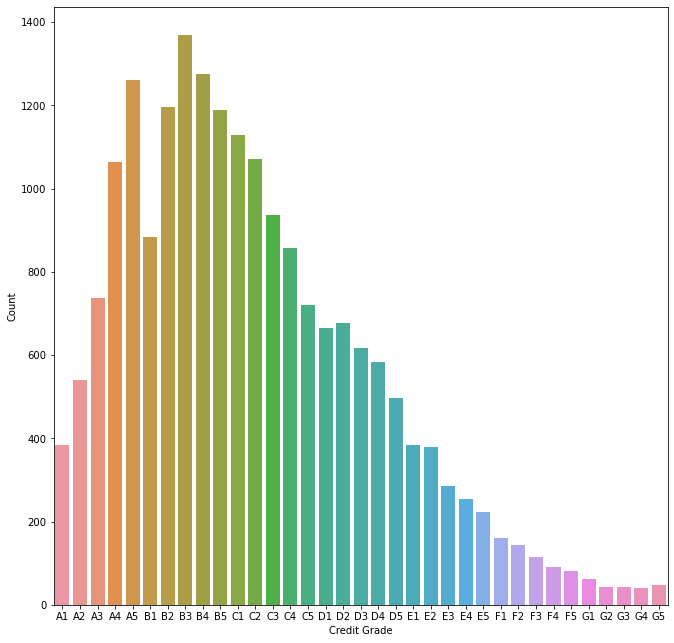

In [64]:
fig,axes = plt.subplots(1,1,figsize=(11,11))
categ = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
axes = sns.countplot(x='CREDIT_Grade',data = data, order=categ,ax=axes)
axes.set(xlabel='Credit Grade', ylabel='Count')
plt.show()

# Highest loan applictions are for B3 credit grade and most loans fall in A4 to C3 credit grades
# Lowest number of applications are for G4 credit grade

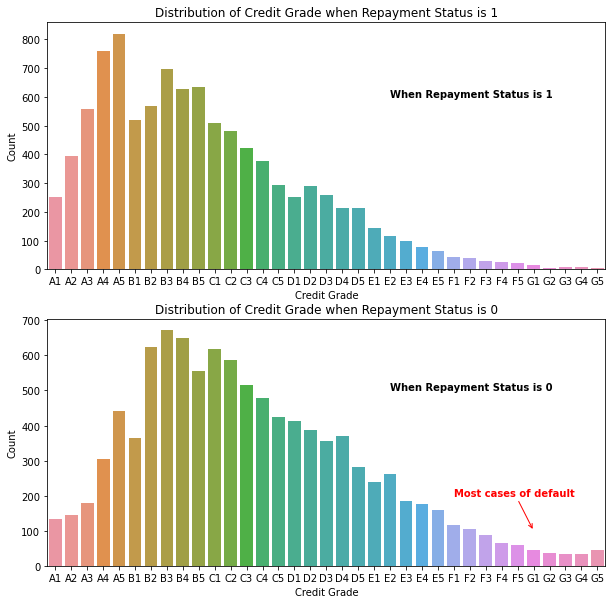

In [10]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
categ = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
sns.countplot(x='CREDIT_Grade', data = data[data['Status'] == 1],ax=axes[0], order=categ)
sns.countplot(x='CREDIT_Grade', data = data[data['Status'] == 0],ax=axes[1], order=categ)
axes[0].set(xlabel='Credit Grade', ylabel='Count',title ='Distribution of Credit Grade when Repayment Status is 1')
axes[0].text(21, 600,                                                                                                                                                                                                                                                                                                                                                       'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
axes[1].set(xlabel='Credit Grade', ylabel='Count',title ='Distribution of Credit Grade when Repayment Status is 0')
axes[1].text(21, 500,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
el = Ellipse((2, -1), 0.5, 0.5)
axes[1].add_patch(el)
plt.annotate(                                             
'Most cases of default', xy=(30, 100), xycoords='data',
            xytext=(25, 200), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',color='red'),fontsize=10, fontweight = 'bold', color='red')
plt.show()

# Most number of loans are repaid for A3 and A5 credit grades with A5 being the highest
# Most cases of default are for lower credit grades G1 to G5

## Loan Application

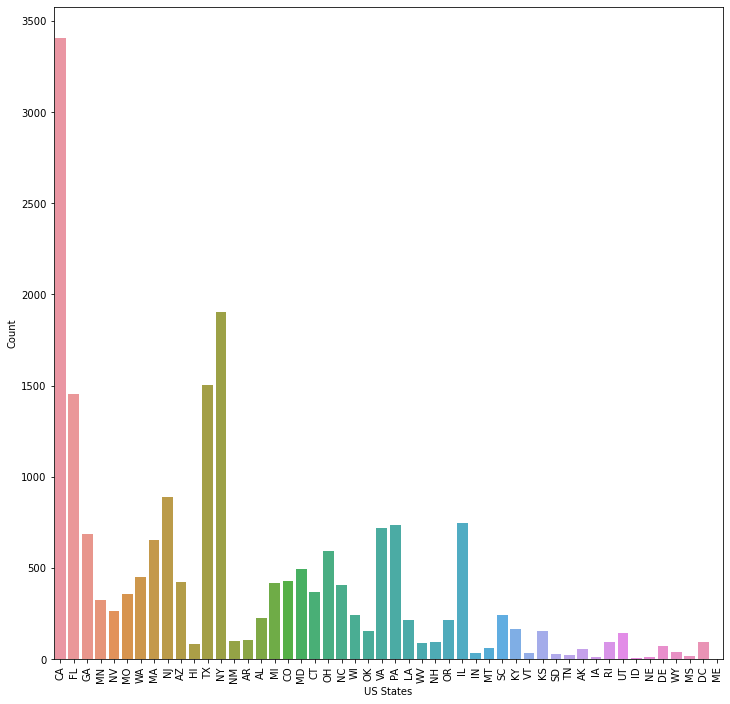

In [11]:
fig,axes = plt.subplots(1,1,figsize=(12,12))
g = sns.countplot(x='State',data = data,ax=axes)
g.set(xlabel='US States', ylabel='Count')
plt.xticks(rotation=90)
plt.show()

# Highest loan applications are in the states of California and New York with California being the highest

## FICO Range :

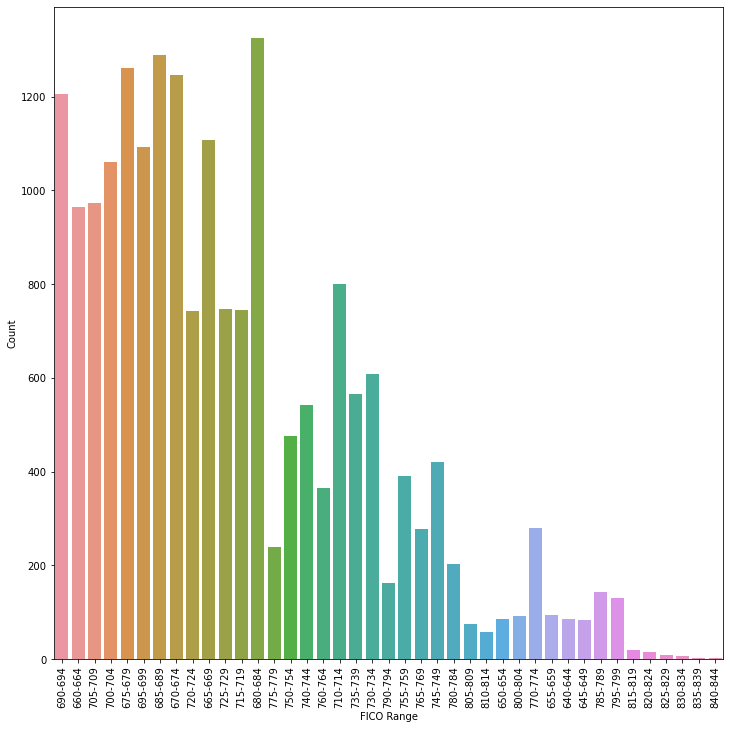

In [12]:
fig,axes = plt.subplots(1,1,figsize=(12,12))
graph = sns.countplot(x='FICO_Range',data= data,ax=axes)
graph.set(xlabel='FICO Range', ylabel='Count')
plt.xticks(rotation=90)
plt.show()

# Applicants with FICO range 680-684 have the highest number of applications & FICO range 840-844 being the lowest

## Employment Length

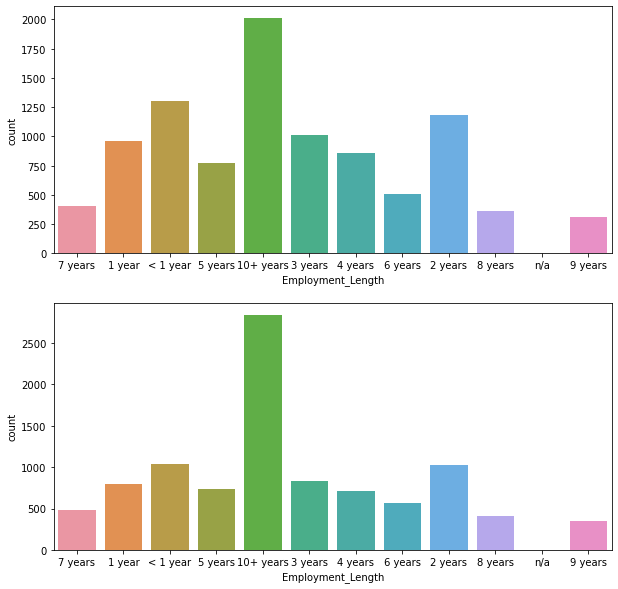

In [13]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
categ = ['7 years','1 year','< 1 year','5 years','10+ years','3 years','4 years','6 years','2 years','8 years','n/a','9 years']
sns.countplot(x='Employment_Length_when_status_1', data = data[data['Status'] == 1],ax=axes[0],order=categ)
sns.countplot(x='Employment_Length_when_status_0', data = data[data['Status'] == 0],ax=axes[1],order=categ)
plt.show()

# Highest loan applications are for applicants with 10+ years of employment when for both repayments and defaults

# Data Preprocessing

### Removing '%' from Interest_Rate

In [14]:
data['Interest_Rate'] = data['Interest_Rate'].str.replace('%','')

### Removing 'months' from Loan_Length

In [15]:
data.loc[data['Loan_Length'] == '36 months','Loan_Length'] = 36
data.loc[data['Loan_Length'] == '60 months','Loan_Length'] = 60

### Tranforming to discrete values for each CREDIT_Grade

In [16]:
data['CREDIT_Grade_Code'] = lbl_enc.fit_transform(data['CREDIT_Grade'])

### Transforming to discrete values for each Loan_Purpose

In [17]:
data['Loan_Purpose'] = lbl_enc.fit_transform(data['Loan_Purpose'])

### Removing '%' from DebtToIncomeRatio

In [18]:
data['DebtToIncomeRatio'] = data['DebtToIncomeRatio'].str.replace('%','')

### Transforming to discrete values for each City

In [19]:
data['City'] = lbl_enc.fit_transform(data['City'])

### Transforming to discrete values for each State

In [20]:
data['State'] = lbl_enc.fit_transform(data['State'])

### Transforming to discrete values for each Home_Ownership

In [21]:
data['Home_Ownership'] = lbl_enc.fit_transform(data['Home_Ownership'])

### Converting FICO_Range to absolute score by taking average

In [22]:
def comp_avg(row):
    if isinstance(row,str):
        t = row.split('-')
        return (int(t[0]) + int(t[1]))/2
    else:
        return 0
    
data['FICO_Range'] = data['FICO_Range'].apply(comp_avg)
data['FICO_Range'].head(5)

0    692.0
1    662.0
2    692.0
3    707.0
4    702.0
Name: FICO_Range, dtype: float64

### Converting Earliest_CREDIT_Line to date-time format

In [25]:
data['Earliest_CREDIT_Line'] = pd.to_datetime(data['Earliest_CREDIT_Line'])

### Removing '%' from Revolving_Line_Utilization 

In [26]:
data['Revolving_Line_Utilization'] = data['Revolving_Line_Utilization'].str.replace('%','')

### Transforming to discrete values for each Employment_Length

In [27]:
data['Employment_Length'] = lbl_enc.fit_transform(data['Employment_Length'])

### Converting  datatype  to float datatype

In [28]:
data['Interest_Rate'] = data['Interest_Rate'].astype(float)
data['Loan_Length'] = data['Loan_Length'].astype(float)
data['DebtToIncomeRatio'] = data['DebtToIncomeRatio'].astype(float)
data['Revolving_Line_Utilization'] = data['Revolving_Line_Utilization'].astype(float)

# Correlation Matrix

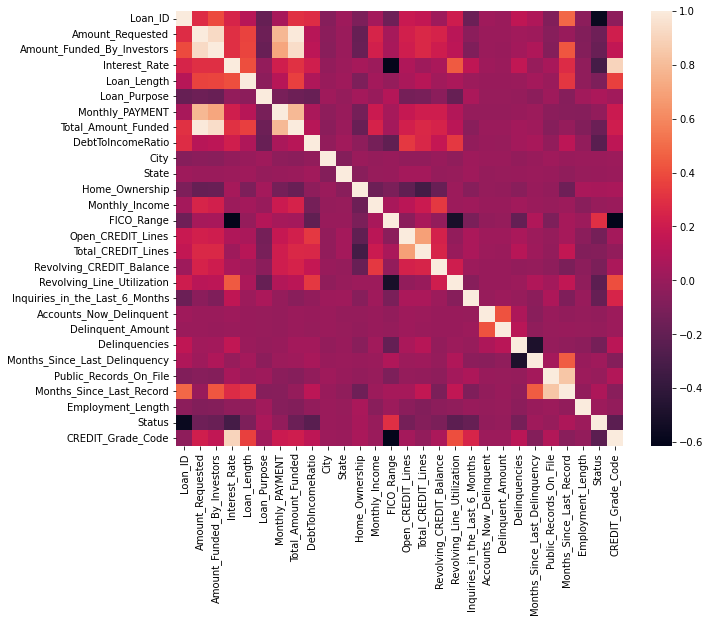

In [29]:
corr = data.corr()
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)
plt.show()

# Highest correlation FICO_Range and Interest Length, FICO_Range, Revolving Line Utilization and Interest Rate

# Conclusion

In [ ]:
# Most number of loans are repaid for A3 and A5 credit grades with A5 being the highest
# Most cases of default are for lower credit grades G1 to G5
# Highest loan applications are in the states of California and New York with California being the highest
# Applicants with FICO range 680-684 have the highest number of applications & FICO range 840-844 being the lowest
# Highest loan applications are for applicants with 10+ years of employment when for both repayments and defaults
# Highest correlation FICO_Range and Interest Length, FICO_Range, Revolving Line Utilization and Interest Rate